In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import math

In [22]:
model = tf.keras.models.load_model('../models/btc_model.h5')

In [3]:
df = pd.read_csv('../data/raw/BTC-USD.csv')

data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [4]:
memory_days = 60

In [5]:
training_data_len = math.ceil(len(scaled_data) * 0.8)

train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - memory_days:, :]

# Criar conjuntos de dados para treinamento
train_X = []
train_Y = []

for i in range(memory_days, len(train_data)):
    train_X.append(train_data[i-memory_days:i, 0])
    train_Y.append(train_data[i, 0])

# Converter para arrays numpy e redimensionar
train_X = np.array(train_X)
train_Y = np.array(train_Y)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

In [7]:
test_X = []
test_Y = scaled_data[training_data_len:, :]

for i in range(memory_days, len(test_data)):
    test_X.append(test_data[i-memory_days:i, 0])

test_X = np.array(test_X)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [14]:
# Usar os últimos dados de teste para iniciar as previsões
last_days = test_X[-1]  # Pega a última sequência do test_X
predictions = []
prevision_days = 60

for _ in range(prevision_days):
    # Reshape para a entrada do modelo
    last_days = last_days.reshape(1, memory_days, 1)
    
    # Previsão do próximo dia
    next_price = model.predict(last_days)
    
    # Inverter a escala
    next_price = scaler.inverse_transform(next_price)
    predictions.append(next_price[0][0])
    
    # Atualizar last_days com a nova previsão
    next_price_reshaped = next_price.reshape(1, 1, 1)  # Reshape para 3 dimensões
    last_days = np.append(last_days[:, 1:, :], next_price_reshaped, axis=1)

# Resultados das previsões
predictions = np.array(predictions)
print("Previsões para os próximos 30 dias:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [15]:
# Calcular métricas
mae = np.mean(np.abs(predictions - test_Y[:prevision_days, 0]))  # Corrigir conforme a estrutura de test_Y
mse = np.mean((predictions - test_Y[:prevision_days, 0]) ** 2)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 280612.0700587559
MSE: 79600366859.73637
RMSE: 282135.36974249856


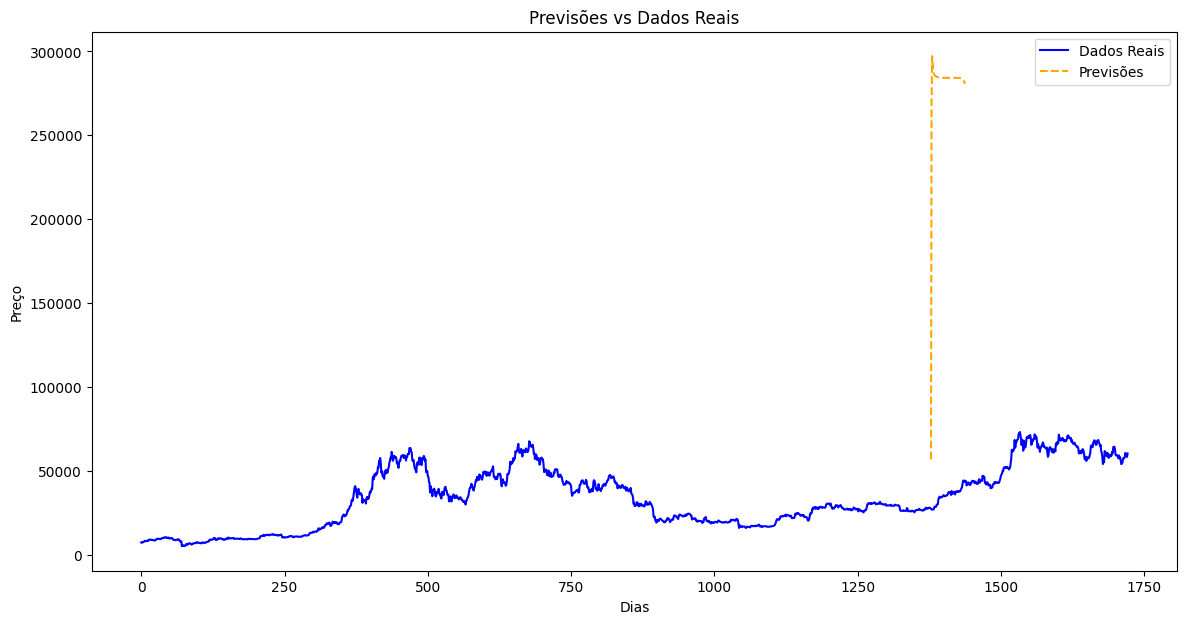

In [16]:
# Tamanho total da série de dados
total_data = dataset[:, 0]  # ou dataset['coluna'] se for um DataFrame
train_size = len(train_data)  # Tamanho dos dados de treino

# Crie um array vazio para armazenar todas as previsões
full_predictions = np.empty_like(total_data)
full_predictions[:] = np.nan  # Preencha com NaN para manter o formato

# Preencha as previsões na posição correta
full_predictions[train_size:train_size + prevision_days] = predictions

# Configurações do gráfico
plt.figure(figsize=(14, 7))  # Aumentar o tamanho do gráfico
plt.plot(total_data, label='Dados Reais', color='blue')  # Todos os dados
plt.plot(full_predictions, label='Previsões', linestyle='--', color='orange')  # Previsões
plt.title('Previsões vs Dados Reais')
plt.xlabel('Dias')
plt.ylabel('Preço')
plt.legend()
plt.show()